In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import re, glob
import os, sys
from scipy import stats

In [2]:
#THIS CODE WAS ONLY NEEDED ONCE, TO CREATE A UNIFIED CSV FILE WITH WEIGHTED VARIABLES

# path = r"input_files/spotify_weighted/*.csv"                # The path requires "".csv" at end of file name. 
#                                                                  # This is to prevent the program from blowing up
#                                                                  # when it hits some kind of hidden file. 

# countries_spotify_df = pd.read_csv(glob.glob(path)[0], header=0)           # Sets up main dataframe with data from FIRST file
# string = str(glob.glob(path)[0])                                 # in the folder.
# country_name, = re.findall(r"/spotify_weighted/(.*)_We", string)   # This line extracts the year and month from the 
# countries_spotify_df[['Country']] = country_name

# for file in glob.glob(path)[1:]:                                 # Now that you have the dataframe set up from the 
#         temp_df = pd.read_csv(file, header=0)                    # first file in the folder, this iterates through 
#         string = str(file)                                       # remaining files
#         country_name, = re.findall(r"/spotify_weighted/(.*)_We", string)
#         temp_df[['Country']] = country_name
#         #print (country_name)
#         countries_spotify_df = pd.concat([countries_spotify_df,        # Adds temperary datafame to end of main dataframe
#                                        temp_df])                 # as new rows.       
                                                 

            
# countries_spotify_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, axis=1)
# countries_spotify_df                                                # You should get 4,800 rows (24 months x 200 
#                                                                  # tracks per month)

# countries_spotify_df.to_csv('unified_weighted_variables.csv', index=False)

In [3]:
weighted_data_df = pd.read_csv("input_files/spotify_weighted/unified_weighted_variables.csv")
weighted_data_df

,Year,Month,Danceability %,Energy %,Valence %,Country
0,2019,1,0.690073,0.464874,0.600466,New Zealand
1,2019,2,0.685002,0.441264,0.588278,New Zealand
2,2019,3,0.686947,0.457023,0.588093,New Zealand
3,2019,4,0.694459,0.481932,0.566785,New Zealand
4,2019,5,0.694453,0.491478,0.587496,New Zealand
...,...,...,...,...,...,...
235,2020,8,0.711201,0.691012,0.563303,Italy
236,2020,9,0.679361,0.685094,0.525742,Italy
237,2020,10,0.673530,0.684537,0.509986,Italy
238,2020,11,0.704707,0.651164,0.485930,Italy


In [4]:
#countries_to_plot = sorted(list(weighted_data_df['Country'].unique()))

countries_to_plot = ['Global', 'Brazil', 'Germany','India', 'Italy', 'Mexico', 'New Zealand', 'Spain', 'United Kingdom', 'United States']
countries_to_plot

['Global',
 'Brazil',
 'Germany',
 'India',
 'Italy',
 'Mexico',
 'New Zealand',
 'Spain',
 'United Kingdom',
 'United States']

In [5]:
# Set up some basic plt formatting configurations

plt.rc('font', size=12)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=20)

# Create a function to match labels to a the correlation r coefficients. This will come in handy below 

def r_label(r):
    abs_r = abs(r)
    if abs_r >= .8 : return "Very Strong"
    elif abs_r >= .6 : return "Strong"
    elif abs_r >= .4: return "Moderate"
    elif abs_r >= .2: return "Low"
    else: return "Negligible"
    
def p_label(p):
    if p <= .05 : return "significant"
    else: return "insignificant"

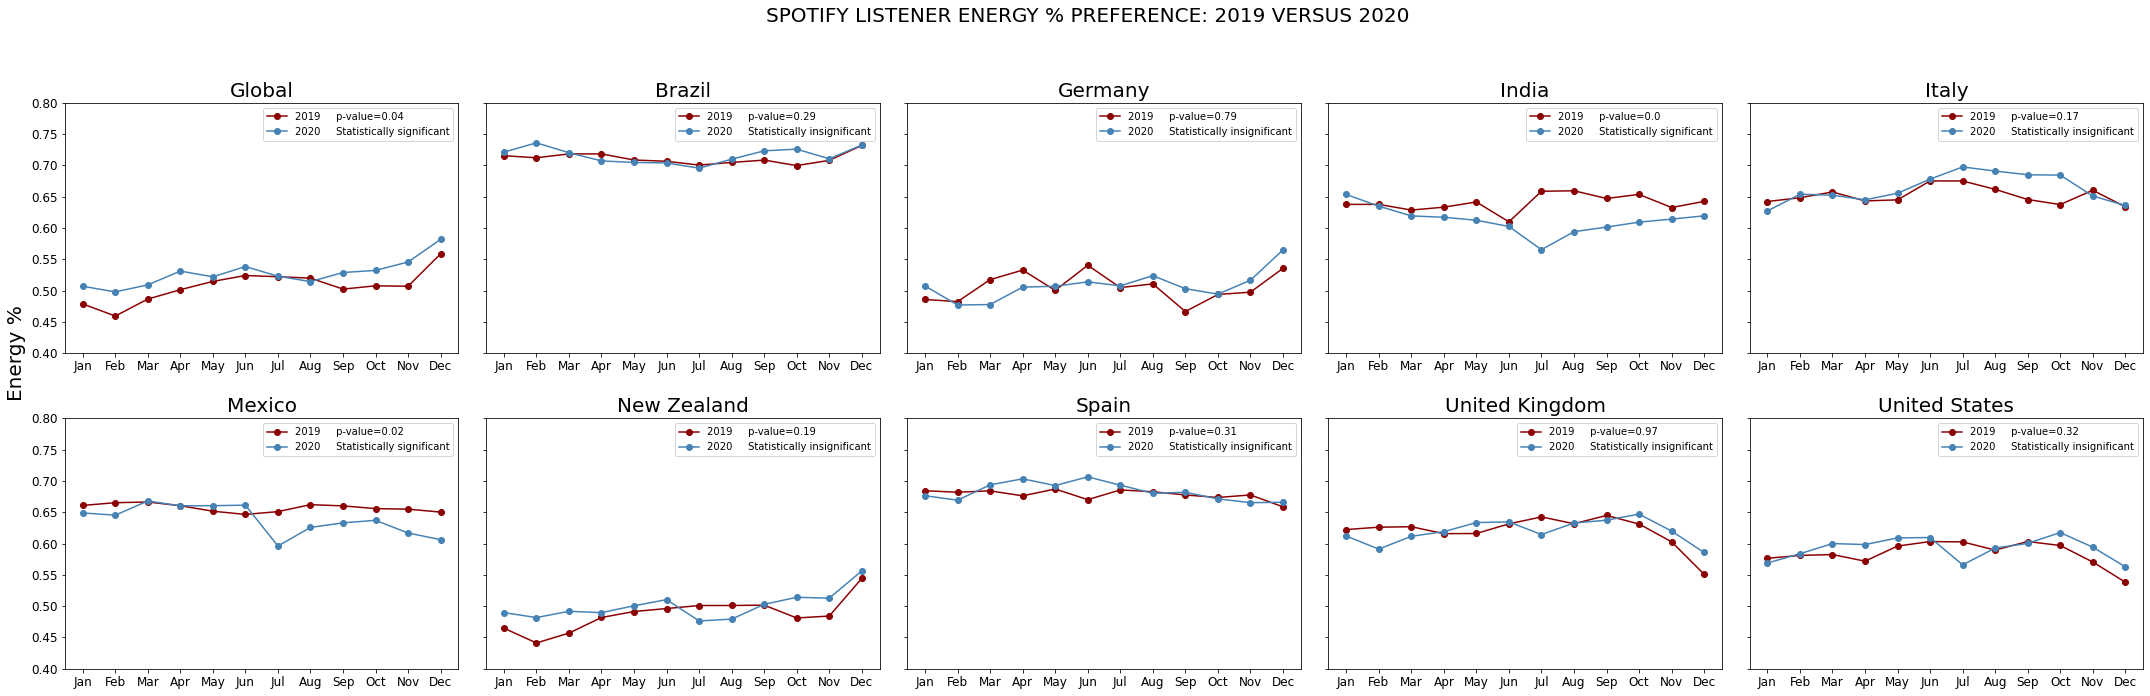

In [6]:
# Plot a comparison of 2019 2020 variable averages

# CHANGE VARIABLE TO PLOT HERE Valence, Danceability, Energy
# ----------------------------
variable_to_plot = 'Energy %'
# ----------------------------

fig, ((ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9)) = plt.subplots(2,5, sharey=True, figsize=(30,10))    # Set up figure for subplots

plot_list = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]  # Set up list of plots to help with the for loop below

plt.subplots_adjust(hspace=.3, wspace=0.05)                     # Formatting        

fig.suptitle(f"SPOTIFY LISTENER {variable_to_plot.upper()} PREFERENCE: 2019 VERSUS 2020\n",  size=20)     # Set title for the whole figure

fig.text(0, .5, f"{variable_to_plot}",           # Set label for shared y axis. This seemed to be
         va='center', rotation='vertical', fontsize=20,         # the easiest way. 
         linespacing = 2)  

# Set up lists to plot

for i in range(10):

    country_spotify_df = weighted_data_df[weighted_data_df['Country'] == countries_to_plot[i]]

    variable_2019 = country_spotify_df.loc[country_spotify_df['Year'] == 2019]

    variable_2020 = country_spotify_df.loc[country_spotify_df['Year'] == 2020]
            
    pvalue = stats.ttest_ind(variable_2019[f'{variable_to_plot}'], variable_2020[f'{variable_to_plot}'], equal_var=False)[1]
    plabel = p_label(pvalue)                                  # Call function to create a label for the p value
    
    #valence_2020.drop('Year', inplace=True, axis=1)
    
    x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',                  # Set up x axis
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  
             
    #plot_list[i].set_xlabel(f"Months")                   # Set x axis label for subplot   

    plot_list[i].set_title(f"{countries_to_plot[i]}")       # Set title for subplot

    plot_list[i].plot(x_axis, variable_2019[variable_to_plot], label=f"2019     p-value={round(pvalue, 2)}", marker='o', color='darkred')  # Plot 2019
    plot_list[i].plot(x_axis, variable_2020[variable_to_plot], 
                      label=f"2020     Statistically {plabel}", marker='o', color='steelblue')  # Plot 2020

    #plot_list[i].xlim(-0.75, len(x_axis)-0.25)                                    # Set up axis limits
    plot_list[i].set_ylim([.4, .8])

    plot_list[i].legend(fontsize=10)                                   # Add the legend

fig.tight_layout(pad=2)   


plt.savefig(f"output_files/{variable_to_plot}.png")        # Save the png file   
plt.show()
    



In [7]:
# Covid data

covid_df = pd.read_csv("input_files/owid-covid-data.csv")                # read the covid data file
covid_df2 = covid_df.replace('World', 'Global')
covid_df2.head()
#covid_df2['location'].unique()
#covid_df2['date']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [8]:

countries_covid_df = covid_df2.loc[covid_df2['location'].isin(countries_to_plot)]  # Filter for country of your choice

countries_covid_df.to_csv("input_files/filtered_covid_data.csv")

countries_covid_df[['Year']] = ''
countries_covid_df[['Month']] = ''
countries_covid_df.head()
#countries_covid_df['location'].unique()


C:\Users\Prueba\anaconda3\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-8-b5bac21f8722>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_covid_df[['Year']] = ''
C:\Users\Prueba\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Year,Month
10813,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,,
10814,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,,
10815,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,,
10816,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,,
10817,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,,


In [9]:
for index, row in countries_covid_df.iterrows():
    
    try:
        countries_covid_df.at[index, 'Year'] = int(row['date'].split('-')[0])
        countries_covid_df.at[index, 'Month'] = int(row['date'].split('-')[1])
    except: 
        countries_covid_df.at[index, 'Year'] = np.nan
        countries_covid_df.at[index, 'Month'] = np.nan

countries_covid_df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Year,Month
10813,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2
10814,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2
10815,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2
10816,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2
10817,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,3


In [10]:
countries_covid_2020_df = countries_covid_df[countries_covid_df['Year'] == 2020]
countries_covid_2020_df = countries_covid_2020_df.rename(columns={"new_cases": "New Cases", 'new_deaths' : "New Deaths"})
countries_covid_2020_df.head()


,iso_code,continent,location,date,total_cases,New Cases,new_cases_smoothed,total_deaths,New Deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Year,Month
10813,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2
10814,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2
10815,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2
10816,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2
10817,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,3


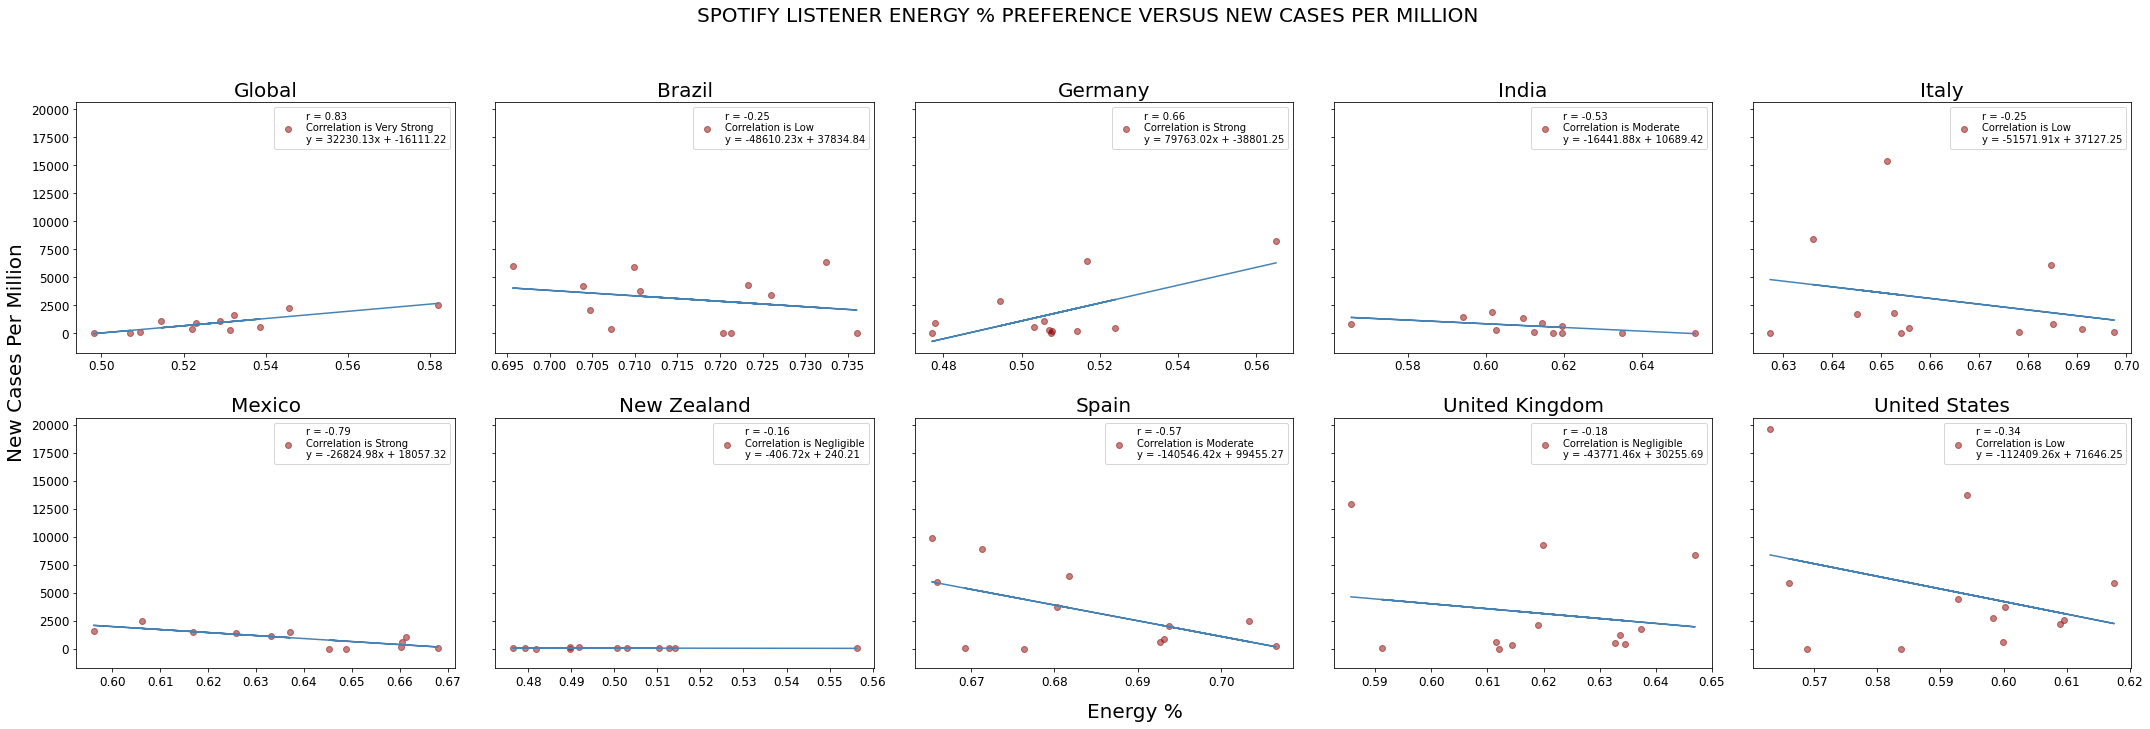

In [13]:
# Scatter plot comparison of 2020 data and covid variables

country_populations = [7674000000, 211000000, 84000000, 1366000000, 60000000, 127000000, 4917000, 47000000, 66650000, 328000000]

# CHANGE VARIABLE NAME TO PLOT HERE
# ---------------------------------
spotify_variable_to_plot = 'Valence %'
covid_variable_to_plot = 'New Cases Per Million'
# ----------------------------

fig, ((ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9)) = plt.subplots(2,5, sharey=True, figsize=(30,10))    # Set up figure for subplots

plot_list = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]  # Set up list of plots to help with the for loop below

plt.subplots_adjust(hspace=.3, wspace=0.05)                     # Formatting        

fig.suptitle(f"SPOTIFY LISTENER {spotify_variable_to_plot.upper()} PREFERENCE VERSUS {covid_variable_to_plot.upper()}\n",  size=20)     # Set title for the whole figure

fig.text(0, .5, f"{covid_variable_to_plot}",           # Set label for shared y axis. This seemed to be
         va='center', rotation='vertical', fontsize=20,         # the easiest way. 
         linespacing = 2)  

fig.text(.5, 0, f"{spotify_variable_to_plot}",           # Set label for shared y axis. This seemed to be
         va='center', rotation='horizontal', fontsize=20,         # the easiest way. 
         linespacing = 2) 
# Set up lists to plot
   
for i in range(10):

    #ORGANIZAING SPOTIFY DATA
    country_spotify_df = weighted_data_df[weighted_data_df['Country'] == countries_to_plot[i]]

    variable_2020 = country_spotify_df.loc[country_spotify_df['Year'] == 2020]
    
    #ORGANIZING COVID DATA
    country_covid_df = countries_covid_2020_df[countries_covid_2020_df['location'] == countries_to_plot[i]]

    country_covid_groupby = country_covid_df.groupby(['Month'], as_index=False)[['New Cases', 'New Deaths']].sum()

    if len(country_covid_groupby) == 11:

        country_covid_groupby.loc[-1] = [1, 0, 0]             # This adds a 1 (month of January) in the first columne 
                                                         # index 0), in the last row of the dataframe. 
            
        country_covid_groupby.index = country_covid_groupby.index + 1   # shifts the index
    
    country_covid_groupby = country_covid_groupby.sort_index()      # sorts by index


    
    #MERGING SPOTIFY WITH COVIDE DATA INTO ONE NICE DATAFRAME TO PLOT
    country_covid_vs_spotify_df= pd.merge(variable_2020, country_covid_groupby, on="Month")

    country_covid_vs_spotify_df['New Cases Per Million'] = country_covid_vs_spotify_df['New Cases'] / country_populations[i] *1000000
    country_covid_vs_spotify_df['New Deaths Per Million'] = country_covid_vs_spotify_df['New Deaths'] / country_populations[i] *1000000
    
    #PLOTTING
    x_axis = country_covid_vs_spotify_df[spotify_variable_to_plot]                                 # Set up axes
    y_axis = country_covid_vs_spotify_df[covid_variable_to_plot]

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)  # Get elements of regression equation
    regress_values = x_axis * slope + intercept                                  # Calculate regression values

    #plt.figure(figsize=(12, 8))

    plot_list[i].set_title(f"{countries_to_plot[i]}")       # Set title for subplot                 
    #plt.ylabel(f"Valence_Stream")                                                       # Set title for subplot

    r = round(stats.pearsonr(x_axis, y_axis)[0],2)                       # Calculate correlation coefficient
    rlabel = r_label(r)                                                 # Call function to create a label for the r number

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))    # Ression formula

    plot_list[i].scatter(x_axis, y_axis, facecolors="darkred",  alpha=.5,        # Plot the scatter chart
    label=f"r = {r}\nCorrelation is {rlabel}\n{line_eq}" ) 

    plot_list[i].plot(x_axis, regress_values, color="steelblue")                 # Plot the regression line    

    plot_list[i].legend(fontsize=10)                                   # Add the legend

fig.tight_layout(pad=2)   


plt.savefig(f"output_files/scatter_{spotify_variable_to_plot}_to_{covid_variable_to_plot}.png")        # Save the png file   

plt.show()



In [12]:
# # Plot a comparison of 2019 2020 variable weighted averages

# variable_to_plot = 'Valence'

# fig, ((ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9)) = plt.subplots(2,5, sharey=True, figsize=(30,10))    # Set up figure for subplots

# plot_list = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]  # Set up list of plots to help with the for loop below

# plt.subplots_adjust(hspace=.3, wspace=0.05)                     # Formatting        

# fig.suptitle(f"SPOTIFY LISTENER {variable_to_plot.upper()} PREFERENCE: 2019 VERSUS 2020\n",  size=20)     # Set title for the whole figure

# fig.text(0, .5, f"{variable_to_plot}",           # Set label for shared y axis. This seemed to be
#          va='center', rotation='vertical', fontsize=20,         # the easiest way. 
#          linespacing = 2)  

# # Set up lists to plot

# for i in range(10):

#     country_spotify_df = country_spotify_df[country_spotify_df['Country'] == countries_to_plot[i]]
    
#     country_spotify_groupby = country_spotify_df.groupby(["Year", 'Month'], as_index=False)[variable_to_plot].sum()

#     variable_2019 = country_spotify_groupby[country_spotify_groupby['Year'] == 2019]

#     variable_2020 = country_spotify_groupby[country_spotify_groupby['Year'] == 2020]
            
#     pvalue = stats.ttest_ind(variable_2019[f'{variable_to_plot}'], variable_2020[f'{variable_to_plot}'], equal_var=False)[1]
#     plabel = p_label(pvalue)                                  # Call function to create a label for the p value
    
#     #valence_2020.drop('Year', inplace=True, axis=1)
    
#     y_axis = variable_2019[variable_to_plot]
#     x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',                  # Set up x axis
#               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  
             
#     #plot_list[i].set_xlabel(f"Months")                   # Set x axis label for subplot   

#     plot_list[i].set_title(f"{countries_to_plot[i]}")       # Set title for subplot

#     plot_list[i].plot(x_axis, variable_2019[variable_to_plot], label=f"2019     p-value={round(pvalue, 2)}", marker='o', color='darkred')  # Plot 2019
#     plot_list[i].plot(x_axis, variable_2020[variable_to_plot], 
#                       label=f"2020     Statistically {plabel}", marker='o', color='steelblue')  # Plot 2020

#     #plot_list[i].xlim(-0.75, len(x_axis)-0.25)                                    # Set up axis limits
#     #plot_list[i].set_ylim([.4, .8])

#     plot_list[i].legend(fontsize=10)                                   # Add the legend

# #fig.tight_layout(pad=2)   


# #plt.savefig(f"output_files/{variable_to_plot}.png")        # Save the png file   
# #plt.show()
# #variable_2019[variable_to_plot]    

